# 线性回归 (linear regreesion)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 单变量线性回归
### 读入数据

(97, 3)
(97, 2)
(97, 1)


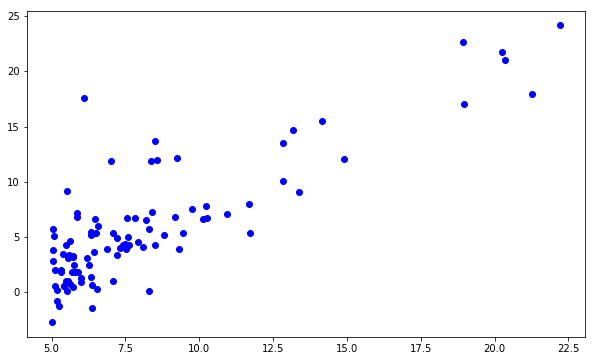

In [2]:
data1 = np.loadtxt('./data/ex1data1.txt',delimiter=',')
data1 = np.insert(data1,0,1,axis=1)
print(data1.shape)
X = data1[:,:2]
y = data1[:,-1:]
print(X.shape)
print(y.shape)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X[:,1], y[:,0],'bo')
plt.show()

### 计算代价函数并进行梯度下降

In [3]:
## 计算代价函数
def computeCost(theta,X,y):
    inner = ((np.dot(X,theta)) - y)** 2
    return np.sum(inner) / (2 * X.shape[0])

initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y)

32.072733877455676

In [4]:
## 梯度下降
def gradientDescent(theta,X,y,alpha,iters):
    cost = np.zeros(iters)
    for i in range(iters):
        error = np.dot(X,theta) - y
        for j in range(X.shape[1]):
            theta[j,0] = theta[j,0] - (alpha/X.shape[0])*np.sum(error*X[:,j:])
        cost[i] = computeCost(theta,X,y)
    
    return theta,cost

initial_theta = np.zeros((X.shape[1],1))
theta, cost = gradientDescent(initial_theta,X,y,alpha=0.01,iters=2000)
print(theta, cost[-1])

[[-3.71956629]
 [ 1.17533453]] 4.479798283010048


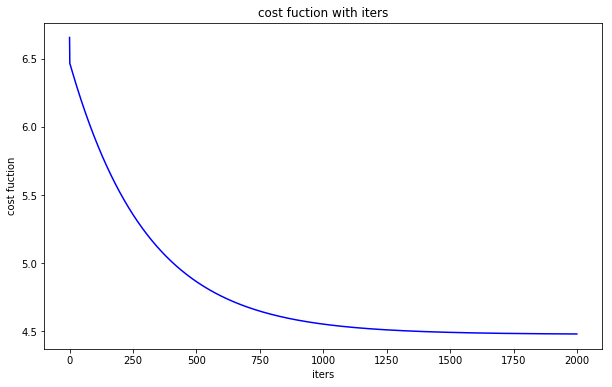

In [5]:
# 显示代价函数的变化
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(cost.shape[0]), cost,'b')
ax.set_xlabel('iters')
ax.set_ylabel('cost fuction')
ax.set_title('cost fuction with iters')
plt.show()

### 显示代价函数拟合结果

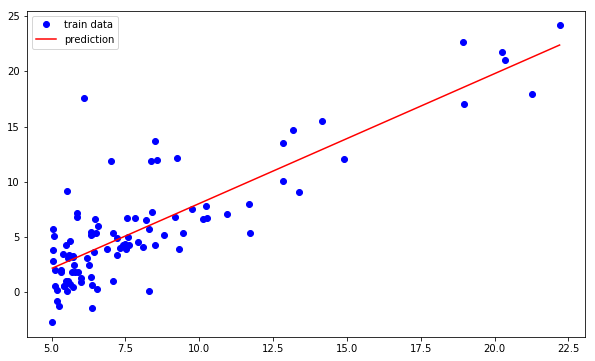

In [6]:
x  = np.linspace(np.min(X[:,1]),np.max(X[:,1]),1000)
y_pre = theta[0,0]+theta[1,0]*x

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(X[:,1], y[:,0],'bo',label='train data')
ax.plot(x,y_pre,'r-',label='prediction')
plt.legend()
plt.show()

## 多变量线性回归
### 读入数据并进行特征归一化

In [7]:
data2 = np.loadtxt('./data/ex1data2.txt',delimiter=',')

#特征归一化
mean_stored =[]
std_sotred=[]
for i in range(data2.shape[1]):
    mean_stored.append(np.mean(data2[:,i]))
    std_sotred.append(np.std(data2[:,i]))
    data2[:,i] = (data2[:,i] - np.mean(data2[:,i]))/np.std(data2[:,i])

data2 = np.insert(data2,0,1,axis=1)
X = data2[:,:-1]
y = data2[:,-1:]
print(X.shape)
print(y.shape)

(47, 3)
(47, 1)


### 进行梯度下降

In [8]:
initial_theta = np.zeros((X.shape[1],1))
print(computeCost(initial_theta,X,y))
theta, cost = gradientDescent(initial_theta,X,y,alpha=0.01,iters=2000)
print(theta, cost[-1])

0.5
[[ 3.52717816e-04]
 [ 8.83959670e-01]
 [-5.25297983e-02]] 0.1335277958386475


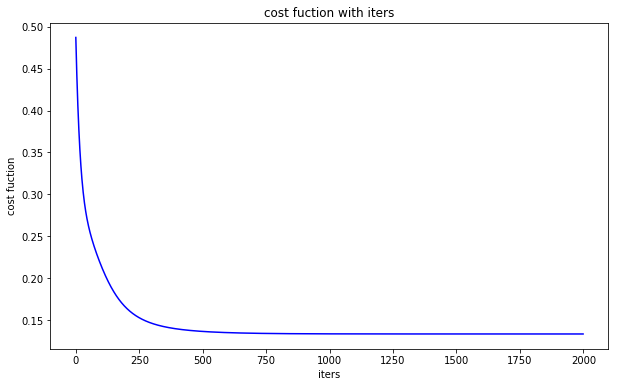

In [9]:
# 显示代价函数的变化
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(cost.shape[0]), cost,'b')
ax.set_xlabel('iters')
ax.set_ylabel('cost fuction')
ax.set_title('cost fuction with iters')
plt.show()

### 检查预测结果是否拟合

In [10]:
#假设房屋面积为1650，并且有3个房间，使用拟合出来的模型来预测该房价
#结果应该在293081左右
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
xtest = np.array([1650.,3.])
xtest_norm = np.array([(xtest[i]-mean_stored[i])/std_sotred[i] for i in range(2)]).reshape(1,2)
xtest_norm = np.insert(xtest_norm,0,1,axis=1)
ytest = np.dot(xtest_norm,theta)
print(ytest*std_sotred[2]+mean_stored[2])

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
[[293151.43441293]]


## 将梯度下降写为向量形式

0.5
[[-8.31368071e-17]
 [ 8.79065699e-01]
 [-4.74786542e-02]] 0.13354178879075573


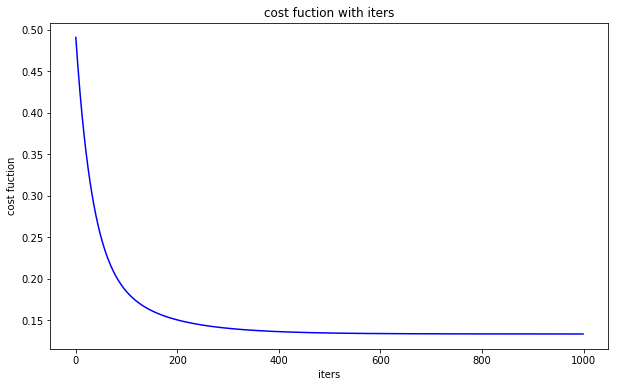

In [11]:
## 将梯度下降写为向量形式求解，少一次循环
def gradientDescent(theta,X,y,alpha,iters):
    cost = np.zeros(iters)
    for i in range(iters):
        error = np.dot(X,theta) - y
        theta = theta - alpha/X.shape[0]*(np.dot(X.T,error))
        cost[i] = computeCost(theta,X,y)
    return theta,cost

initial_theta = np.zeros((X.shape[1],1))
print(computeCost(initial_theta,X,y))
theta, cost = gradientDescent(initial_theta,X,y,alpha=0.01,iters=1000)
print(theta, cost[-1])

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(np.arange(cost.shape[0]), cost,'b')
ax.set_xlabel('iters')
ax.set_ylabel('cost fuction')
ax.set_title('cost fuction with iters')
plt.show()

## 使用sklearn

In [12]:
#使用sklearn中的linear_model进行多变量回归
from sklearn import linear_model
data2 = np.loadtxt('./data/ex1data2.txt',delimiter=',')
X = data2[:,:-1]
y = data2[:,-1:]

model = linear_model.LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print("Check of result: What is price of house with 1650 square feet and 3 bedrooms?")
xtest = np.array([1650.,3.]).reshape(1,2)
ytest = model.predict(xtest)
print(ytest)

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
[[293081.4643349]]
